# Deep Learning Course: Assignment #1 

Submitted by:

**Atheer AboFuol 314642273** 

**Aya Mahagna 314774639**



**Assignment Instruction:**

· Submissions in pairs only.

· The code must be written in Python 3.7+

· You are allowed to use only Pytorch, numpy and matplotlib as external libraries

· The code must be reasonably documented

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


In [ ]:
%matplotlib inline

## Question 1:  Multidimentional XOR and backpropagation


Given $ d $ bits $b=(b_1, b_2, ... , b_d) \in \{0, 1\}^d$, we define $$XOR(b) = Σ_{i=1}^db_i\ mod\ 2$$

You will train a feedforward neural network to model the multidimentional XOR problem.

The following function returns the labeled XOR "dataset" for any given $d$ (`dim`)

In [ ]:
import itertools
import numpy as np

def XORData(dim):
  X = np.array(list(itertools.product([0, 1], repeat=dim)))
  Y = X.sum(axis=1)%2
  return X, Y

# l1=XORData(1)
# l2=XORData(2)
# print(l1)
# print(l2)

Implement the following:

1. A linear layer class:`Linear(torch.nn.Module)`\
• You should inherit from `torch.nn.Module`\
• You can not use `torch.nn.LinearLayer` or any other model implemented by PyTorch, only tensors. Wrap every tensor object with `torch.nn.Parameter` (for the optimizer).\
• Use `torch.randn` to initialize the parameter tensors (weights matrix and biases vector)\
• Implement the `forward` method according to the linear model $y = Wx + b$\
• The number of parameters should be defined by `in_features` and `out_features` \
• Make sure to enable gradient computation!

In [ ]:
%matplotlib inline
import sys
import torch
import torch.nn as nn
torch.set_grad_enabled(True)

class Linear(nn.Module):
  def __init__(self, in_features, out_features, bias=True, requires_grad=True):
    # Implement here
    #in_features: size of input sample
    #out_features: size of output sample
    super(Linear, self).__init__()
    self.in_features = in_features
    self.out_features = out_features
    #self.bias = bias
    self.weight = torch.nn.Parameter(torch.randn(out_features, in_features),requires_grad=True) # the learnable weights of shape (in_features,out_features).
                                                                             # the values are init from U(-sqrt(k),sqrt(k)) where k=1/in_features
    if bias:#the learnable weights of shape (out_features).
      self.bias = torch.nn.Parameter(torch.randn(out_features),requires_grad=True) # if bias=True the values are init from U(-sqrt(k),sqrt(k)) where k=1/in_features
    else:
      self.register_parameter('bias', None)# will not learn additive bias
    
  def forward(self, x): # x==input
    # Implement here
    # y = x.shape[1] # get the shape of the input. y= #columns are in the input
    # if y != self.in_features: # check whether the input size match
    #   sys.exit(f'Wrong Input Features. Please use tensor with {self.in_features} Input Features')
    #   return 0
    output = x @ self.weight.t() + self.bias
    return output

#test
my = Linear(20,10)
my(torch.randn(5,20))

tensor([[  6.2520,   2.1850,   1.7440,  -3.4900,  -3.5230,   2.3053,   0.4900,
          -0.3859,  -3.3380,  -0.4303],
        [ -5.1391,   1.3779,  -1.9538,   0.1524,  -4.2088,   8.1434,   0.1297,
           3.5918,  -1.5595, -13.8962],
        [ -7.0851,  -3.2050,  -3.6841,   0.1293,  -3.8657,   7.9512,  -4.8430,
           5.1852,  -3.4599,  -1.8395],
        [  3.0135,   5.3865,   1.8945,  -3.9468,  -7.0185,  -2.0988,   1.5405,
           0.3078,   6.0230,  -1.5209],
        [-10.2163, -12.1757,   2.2279,   9.7616,  -8.0361,  -5.9970,   3.2089,
           4.5596,  -6.6732,  -3.5387]], grad_fn=<AddBackward0>)

2. A feedforward neural network:`FFNet(torch.nn.module)`\
• Use the `Linear` class you implemented to construct a network with `in_features` input size, `out_features` output size, and one hidden layer with `hidden_size` neurons.\
• Use the sigmoid activation function on top of the hidden layer neurons.\
• The XOR example we saw in class should help you.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class FFNet(nn.Module):
  def __init__(self, in_features, out_features, hidden_size): # hidden_size == number of neurons in the hidden layer
    # Implement here
    super(FFNet, self).__init__()
    self.lin1 = Linear(in_features, hidden_size)
    self.lin2 = Linear(hidden_size, out_features)
    #optim.zero_grad()

  def forward(self, x):
    # Implement here
    x = self.lin1(x)
    sig = torch.sigmoid(x) # nonlinear model
    yh = self.lin2(sig)
    return yh

### Exploring the hidden layer
In class we talked about the **Universal Approximation Theorem**. The following question will help us to understand how hard is finding the optimal weight that the theorem talks about.

You are given a basic training function.

In [ ]:
import numpy as np
import torch.optim as optim

loss_func = nn.MSELoss()

def train(net, X, Y, epochs=3000):
  optimizer=optim.SGD(net.parameters(), lr=0.02, momentum=0.9)
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint((X.shape[0]))
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])        
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          optimizer.step()
      if(i % 100 == 0):
          print("Epoch:{}, Loss:{}".format(i, loss.detach()))

Using the above, for each of the dimentions: $d = 2, 3, 4, 5$:
1. Create the corresponding dataset using `XORData`
2. Create models with different hidden layer sizes($1, 2, 3, ..., d,d+const, const*d,...$ etc.) and an optimizer for it using: `optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
`
3. Try to train the different networks on the dataset.

Make sure to create a new `FFNet` and optimizer objects each time you call `train`.


In [ ]:
torch.set_grad_enabled(True)

dims=[2,3,4,5]
for d in dims:
  X,Y=XORData(d)
  #print(X)
  #print(X.ndim)
  hidden_sizes=[1,2,3,4,5,d+2,d*2,d*10]
  for h in hidden_sizes:
    print("input dim = " + str(d) + ", number of neurons in hidden layer = " + str(h))
    model=FFNet(d,1,h) # d --> h --> 1
    optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
    nn.MSELoss()
    train(model,X,Y) 

input dim = 2, number of neurons in hidden layer = 1
Epoch:0, Loss:0.000865877722389996
Epoch:100, Loss:0.15228094160556793
Epoch:200, Loss:0.003648211481049657
Epoch:300, Loss:0.21999414265155792
Epoch:400, Loss:0.005923900753259659
Epoch:500, Loss:0.2121741771697998
Epoch:600, Loss:0.36801785230636597
Epoch:700, Loss:0.05768999084830284
Epoch:800, Loss:0.40835124254226685
Epoch:900, Loss:0.033550798892974854
Epoch:1000, Loss:0.12736910581588745
Epoch:1100, Loss:0.7007320523262024
Epoch:1200, Loss:0.008465690538287163
Epoch:1300, Loss:0.15642769634723663
Epoch:1400, Loss:0.35995039343833923
Epoch:1500, Loss:0.0035274208057671785
Epoch:1600, Loss:0.004761000629514456
Epoch:1700, Loss:0.06038093939423561
Epoch:1800, Loss:0.4106464087963104
Epoch:1900, Loss:0.00012960519234184176
Epoch:2000, Loss:0.0926036462187767
Epoch:2100, Loss:0.1281914860010147
Epoch:2200, Loss:0.07904102653265
Epoch:2300, Loss:0.005149685777723789
Epoch:2400, Loss:0.10470295697450638
Epoch:2500, Loss:0.02972977422

(1) For which dimensions you were able to reach a model that converges (loss value is getting close to 0)?\
\
(2) What is the number of hidden neurons in that network and how did you find it?\
\
(3) What results did you expect and how does it differ from the results you achieved?


**Answers:** \
(1) input dim = 3, number of neurons in hidden layer = 30\
(2) 30\
(3) Finding the real number of hidden layers is a very difficult task. \
Normally with the **increment of any hidden layers** accuracy of the network increase with the time complexity of the network but when the fourth hidden layer is added to the network the accuracy factor doesn't show any noticeable change.\
**Increment of the number of neurons in the hidden layers** may result in overfitting (NN has so much information processing capacity that the limited amount of information contained in the training set is not enough to train all of the neurons in the hidden layers). it can also can increase the time it takes to train the network.\



### Backpropagation

The following part will focus on the computaion of gradients w.r.t the model parameters, to understand what is happening behind `loss.backward()`.

Implement the function:`calc_gradients(net, x, y_hat, loss)`:

Input: instance of `FFNet` with a hidden layer of size 2, input of size 2 and output of size 1, input vector `x` and `loss` value.

Output: One dimensional tensor with the gradients of the loss w.r.t each of the parameters, ordered as the corresponding parameters order `net.parameters()` returns (if we would flatten it's output). 

1. Compute (by hand) the derivatives w.r.t the second linear layer parameters
2. Use the chain rule to compute (by hand) the derivatives w.r.t the first linear layer parameters
3. Implement the final form computations per parameter.
4. Order the gradients as described above

Practical number 4 slides 26-28 should be helpful.

In [ ]:
from torch.functional import Tensor

def sigmoid(self, x): # compute and return the sigmoid activation value for a given input value
		return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(self, x):	# compute the derivative of the sigmoid function ASSUMING that x has already been passed through the 'sigmoid' function
		return x * (1 - x)

  
def calc_gradients(net, x, y_hat, loss):
		w11=net.weights.t(0)
	  w12=net.weights.t(1)
  	w13=net.weights.t(2)
    w14=net.weights.t(3)
	  w21=net.weights.t(4)
 	  w22=net.weights.t(5)
	  z1=sigmoid(w11*x[0]+w13*x[1])
	  z2=sigmoid(w12*x[0]+w14*x[1])
	  L_d_y_hat=2*math.sqrt(loss)
   	y_hat_d_w21 = z1
	  y_hat_d_w22=z2
  	L_d_w22 = L_d_y_hat * y_hat_d_w22
	  L_d_w21 = L_d_y_hat * y_hat_d_w21
  	y_hat_d_z1=w21
  	y_hat_d_z1=w22
	  z1_d_w11 = sigmoid_deriv(z1)
    L_d_w11 = L_d_y_hat * y_hat_d_z1 * z1_d_w11



# def calc_gradients(net, x, y):
#     # calculate the gradient for all steps
#     d_L_y_hat = net.y_hat - y
#     d_y_hat_z2 = gradient_sigmoid(net.z2)
#     d_z2_w2 = np.append(1,net.a1)
#     d_z2_a1 = np.array([net.w_2[1], net.w_2[2]])
#     d_a1_z1 = np.array([[gradient_sigmoid(net.z1[1]), 0],
#                         [0, gradient_sigmoid(net.z1[1])]])
#     d_z1_w1 = np.array([[1, x[0], x[1], 0, 0, 0],
#                         [0, 0, 0, 1, x[0], x[1]]])
#     # backward, calculate the gradient of W1 and W2
#     d_W2 = d_L_y_hat * d_y_hat_z2 * d_z2_w2
#     d_W1 = d_L_y_hat * d_y_hat_z2 * d_z2_a1
#     d_W1 = np.dot(d_W1, d_a1_z1)
#     d_W1 = np.dot(d_W1, d_z1_w1).reshape(2,3)
#     return d_W1, d_W2


Run the following cell to check the correctness of your computation:

In [ ]:
loss_func = nn.MSELoss()

def equal_gradients(net, x, y_hat, loss):
  grads = []
  for param in net.parameters():
    grads.append(param.grad.view(-1))
  grads = torch.cat(grads)
  return True if torch.sum(grads - calc_gradients(net, x, y_hat, loss)) == 0 else False

def train_and_compare(net, X, Y, epochs=100):
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint(X.shape[0])
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])        
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          if not equal_gradients(net, x_var, y_hat, loss.item()):
            print("Wrong gradients computation!")
            return
          optimizer.step()
  print("Correct gradients computation!")

model = FFNet(2, 1, 2)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
X, Y = XORData(2)


#train_and_compare(model, X, Y)
print(model.parameters())

AttributeError: ignored

### Question 2: Solving Fashion-MNIST

In class we've learned about MNIST data set, which can be loaded from torchvision.datasets.
We built a feedforward network for MNIST classification with accuracy of ~96%.
In this assignment we will use Fashion-MNIST, which is also a built-in dataset in Pytorch. We'll
try different networks and find which one fits better.

The code must run on GPU.

In [ ]:
import torch

# Use .to(device) when needed to train on GPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Add any additional functions here
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
print(device)

cuda


Please implement the following modules and functions:
1. Function 1: `load_dataset()`\
Load the Fashion-MNIST training and test set from Pytorch. Split the training set to
training and validation set (80%-20% ratio). Define a DataLoader for each set. In the
DataLoader parameters use "batch_size"=64.


In [ ]:
import torchvision
import torchvision.transforms as transforms
from google.colab import files
import matplotlib.pyplot as plt
import math
import os
import inspect
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import torch.nn as nn


### Implement here
def load_dataset():
    normal = transforms.Normalize((0.1307,), (0.3081,))
    toTensor = transforms.ToTensor()
    mnist_transform = transforms.Compose([toTensor, normal])
    init_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=mnist_transform)
    test_set = datasets.FashionMNIST(root='./data', train=False, download=True, transform=mnist_transform)
    train_size = int(len(init_dataset) * 0.8)
    validation_size = int(len(init_dataset) * 0.2)
    train_set, validation_set = torch.utils.data.random_split(init_dataset, [train_size, validation_size])
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=64)
    val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64)
    test_loader = torch.utils.data.DataLoader(test_set, 64, shuffle=False)
    return train_loader, val_loader, test_loader
train_loader, val_loader, test_loader = load_dataset()

#print(len(train_set))
#print(len(val_set))
#print(len(test_set))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# in_features - number of input features
# n_hidden_layer - list of integers every index represent the layer number and the value the number of neurons in each layer.
# out_features - Number of neurons in the output
# activation_function -  the activation function (Sigmoid/relu/tanh)
input_size = 28 * 28  
output_size = 10
accuracy_folder_path = "./data/accuracy_file"
plots_folder_path = "./data/plots"
if not os.path.exists(accuracy_folder_path):
    os.makedirs(accuracy_folder_path)

if not os.path.exists(plots_folder_path):
    os.makedirs(plots_folder_path)

class GenericNetwork(torch.nn.Module):
    def __init__(self, in_features, n_hidden_layer, out_features, activation_function):
        activation_fun =  {'relu': torch.nn.ReLU, 'tanh': torch.nn.Tanh, 'sigmoid': torch.nn.Sigmoid, 'Non': None}
        super().__init__()
        layers = []
        network_list = [in_features, *n_hidden_layer, out_features]

        for index, (dim_in, dim_out) in enumerate(zip(network_list[:-1], network_list[1:])):
            if activation_fun[activation_function] is not None and index != len(network_list) - 1:
                layers += [
                    torch.nn.Linear(dim_in, dim_out, bias=True),
                    activation_fun[activation_function]()
                ]
            else:
                layers += [
                    torch.nn.Linear(dim_in, dim_out, bias=True)
                ]
        self.fc_layers = torch.nn.Sequential(*layers)
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, x):
       res = self.fc_layers(x)
       return self.softmax(res)

def training(epochs, optimizer, loss_func, model, schedule=None, train_data_loader=None, is_loss=False, patience=-1):
    val_acc = []
    train_acc = []
    loss_train = []
    loss_validation = []
    stop_epoch = epochs
    min_epoch = 0
    min_loss = math.inf
    count = 1000
    train_dataloader = train_loader if train_data_loader is None else train_data_loader
    if patience > 0:
        count = patience
    for i in range(epochs):
        cur_epoch = i
        for j, (data, label) in enumerate(train_dataloader):
            optimizer.zero_grad()
            data = data.view(-1, input_size).to(device)
            y_hat = model(data)
            loss = loss_func(y_hat, label.to(device))
            loss.backward()
            optimizer.step()
        if schedule is not None:
            schedule.step()
        if is_loss:
            loss_train.append(loss.detach())
            model.eval()
            with torch.no_grad():
                for j, (data, label) in enumerate(val_loader):
                    optimizer.zero_grad()
                    data = data.view(-1, input_size).to(device)
                    y_hat = model(data)
                    loss = loss_func(y_hat, label.to(device))
                    optimizer.step()
                if schedule is not None:
                    schedule.step()
                loss_val = loss.detach()
                loss_validation.append(loss_val)
                if loss_val < min_loss:
                    min_loss = loss_val
                    torch.save(model.state_dict(), "./data/best_model.pth")
                    min_epoch = i
                    count = patience
                elif loss_val > min_loss:
                    count -= 1
            model.train() 
        train_acc.append(get_accuracy(train_dataloader, model))
        val_acc.append(get_accuracy(val_loader, model))
        if count == 0:
            stop_epoch = cur_epoch + 1 
            break
    if is_loss:
        return train_acc, val_acc, loss_train, loss_validation, stop_epoch, min_epoch
    else:
        return train_acc, val_acc

def get_accuracy(data_loader, model, title=None):
    count = 0
    total = 0
    for i, (data, label) in enumerate(data_loader):
        data = data.view(-1, input_size).to(device)
        y_hat = model(data)
        predict = torch.argmax(y_hat, dim=1)
        count += torch.sum(predict == label.to(device)).type(torch.float32)
        total += data.shape[0]
    accuracy = (count / total).item() * 100
    if title is not None:
        with open(f"./data/accuracy_file/{title}.txt", 'w') as file:
            file.write(f"accuracy : {accuracy} %")
    return accuracy


def plot_add(x_axis, title, y_axis, number_of_neurons):
    if type(x_axis) == int:
        x_list = list(range(x_axis))
    else:
        x_list = x_axis
    file_name = f"{inspect.stack()[1].function}_{number_of_neurons}_{title}"
    file_path = f"./data/plots/{file_name}"
    fig = plt.figure()
    plt.plot(x_list, y_axis, 'r')
    plt.title(f"{title}")
    fig.savefig(file_path)
# Calculate and return accurency
def calculate_acc(dataset_loader,model):
    n_correct = 0
    n_total = 0
    for j,(data,label) in enumerate(dataset_loader):   
        #flatten the image to vector of size 28*28
        data = data.view(-1,28*28)
        #calculate output    
        y_hat = model(data)
        #get the prediction
        predictions = torch.argmax(y_hat, dim=1)
        n_correct += torch.sum(predictions == label).type(torch.float32)
        n_total += data.shape[0]
    acc = (n_correct / n_total).item()
    return acc
# Returns test accurancy array
def calculate_test_acc(dataset_loader,model):
    n_correct = 0
    n_total = 0
    test_acc=[]
    for j,(data,label) in enumerate(dataset_loader):   
        #flatten the image to vector of size 28*28
        data = data.view(-1,28*28)
        #calculate output    
        y_hat = model(data)
        #get the prediction
        predictions = torch.argmax(y_hat, dim=1)
        n_correct += torch.sum(predictions == label).type(torch.float32)
        n_total += data.shape[0]
        test_acc.append((n_correct / n_total).item())
    return test_acc

2. Function 2: `one_hidden_layer_no_activation(number_of_neurons)`\
For this function, you should implement the following steps:\
• Define the model: feed-forward network with one hidden layer, no activation
functions are applied on the hidden layer (linear). The number of neurons in the
hidden layer is given by the parameter “number_of_neurons”. The output layer
activation function is log softmax (recall what should be the dim of the output
layer as we learned in class).\
• Train the network on the Fashion-MNIST training set for 50 epochs\
• Use [cross entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as a cost function\
• Use the optimizer: learning_rate = 0.01\
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
def one_hidden_layer_no_activation(number_of_neurons):
  learning_rate = 0.01
  nb_epochs=50
  model1 = nn.Sequential(
      nn.Linear(28*28,number_of_neurons),
      nn.Linear(number_of_neurons,10),
      nn.LogSoftmax(dim=1))
  optimizer =torch.optim.SGD(model1.parameters(),lr=learning_rate)
  loss=nn.CrossEntropyLoss()
  train_acc=list()
  val_acc=list()
  plot_train=list()
  plot_val=list()
  for epochs in range(nb_epochs):
    training_losses=list()
    plot_training=list()
    for batch in train_loader:
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      l = model1(x)
      J = loss(l,y)
      model1.zero_grad()
      J.backward()
      optimizer.step()
      training_losses.append(J.item())
    plot_train.append(torch.tensor(training_losses).mean())
    train_acc.append(calculate_acc(train_loader,model1))

    val_losses=list()
    for batch in val_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      with torch.no_grad():
        l = model1(x)
      J = loss(l,y)
      val_losses.append(J.item())
    plot_val.append(torch.tensor(val_losses).mean())
    val_acc.append(calculate_acc(val_loader,model1))
    # if (epochs)%10==0:
    #   print(f'Epoch {epochs +1}, train loss: {torch.tensor(training_losses).mean():.2f}, Validation loss: {torch.tensor(val_losses).mean():.2f}')
  plt.plot(range(nb_epochs),train_acc,color='red')
  plt.plot(range(nb_epochs),val_acc,color='green')
  plt.xlabel('Number of Iterations')
  plt.ylabel('Accuracy')
  plt.show()
  test_acc=calculate_test_acc(test_loader,model1)
  plt.plot(range(len(test_loader)),test_acc,color='red')
  plt.xlabel('Test Batches')
  plt.ylabel('Accuracy')
  plt.show()
  return model1

3. Function 3: `two_hidden_layers_sigmoid(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use sigmoid as activation function\
• Train for 20 epochs with lr = 0.1\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def two_hidden_layers_sigmoid(number_of_neurons):
  learning_rate = 0.1
  epoch=20
  model1 = nn.Sequential(
      nn.Linear(28*28,number_of_neurons),
      nn.Sigmoid(),
      nn.Linear(number_of_neurons,number_of_neurons),
      nn.Sigmoid(),
      nn.Linear(number_of_neurons,10),
      nn.LogSoftmax(dim=1)
  )
  optimizer =torch.optim.SGD(model1.parameters(),lr=learning_rate)
  loss=nn.CrossEntropyLoss()
  train_acc=list()
  val_acc=list()
  plot_train=list()
  plot_val=list()

  for epochs in range(epoch):
    training_losses=list()
    plot_training=list()

    for batch in train_loader: 
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      l =model1(x)
      J = loss(l,y)
      model1.zero_grad()
      J.backward()
      optimizer.step()
      training_losses.append(J.item())
    plot_train.append(torch.tensor(training_losses).mean())
    train_acc.append(calculate_acc(train_loader,model1))
    val_losses=list()

    for batch in val_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      with torch.no_grad():
        l =model1(x)
      J = loss(l,y)
      val_losses.append(J.item())
    plot_val.append(torch.tensor(val_losses).mean())
    val_acc.append(calculate_acc(val_loader,model1))
    # if (epochs)%10==0:
    #   print(f'Epoch {epochs +1}, train loss: {torch.tensor(training_losses).mean():.2f}, Validation loss: {torch.tensor(val_losses).mean():.2f}')
    
  plt.plot(range(epoch),train_acc,color='yellow')
  plt.plot(range(epoch),val_acc,color='blue')
  plt.xlabel('Number of Iterations')
  plt.ylabel('Accuracy')
  plt.show()
  test_acc=calculate_test_acc(test_loader,model1)
  plt.plot(range(len(test_loader)),test_acc,color='orange')
  plt.xlabel('Test Batches')
  plt.ylabel('Accuracy')
  plt.show()
  return model1

4. Function 4: `two_hidden_layers_relu(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use relu as activation function\
• Train for 20 epochs\
• Train the network with different learning rates, plot a figure with the validation
accuracy for each learning rate you tried\
• Use the learning rate that yields the best accuracy on the validation set and
report the accuracy on the test set\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
from traitlets.traitlets import validate

def two_hidden_layers_relu(number_of_neurons):
  number_of_neurons=number_of_neurons
  lr=[0.1,0.05,0.001]
  validation_accuracy_for_learning_rate=[]

  for i in range(len(lr)):
    model3 = nn.Sequential(
      nn.Linear(28*28,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,10),
      nn.LogSoftmax(dim=1)
  )
    learning_rate = lr[i]
    optimizer =torch.optim.SGD(model3.parameters(),lr=learning_rate)
    loss=nn.CrossEntropyLoss()
    nb_epochs=20
    train_acc=list()
    val_acc=list()
    plot_train=list()
    plot_val=list()

    for epochs in range(nb_epochs):
      training_losses=list()
      plot_training=list()

      for batch in train_loader:
        x,y = batch
        b = x.size(0)
        x = x.view(b,-1)
        l = model3(x)
        J = loss(l,y)
        model3.zero_grad()
        J.backward()
        optimizer.step()
        training_losses.append(J.item())
      plot_train.append(torch.tensor(training_losses).mean())
      train_acc.append(calculate_acc(train_loader,model3))
      val_losses=list()

      for batch in val_loader:    
        x,y = batch
        b = x.size(0)
        x = x.view(b,-1)
        with torch.no_grad():
          l = model3(x)
        J = loss(l,y)
        val_losses.append(J.item())

      plot_val.append(torch.tensor(val_losses).mean())
      val_acc.append(calculate_acc(val_loader,model3))

    validation_accuracy_for_learning_rate.append(calculate_acc(val_loader,model3))
    fig = plt.figure(figsize = (10, 5))
    plt.bar(lr, validation_accuracy_for_learning_rate, color ='maroon',width = 0.1)
    plt.xlabel('Learning Rates')
    plt.ylabel('Validation Accuracy')
    plt.title("Validation Accuracy for Various Learning Rates")
    plt.show()
    max_value = max(validation_accuracy_for_learning_rate)
    max_index = validation_accuracy_for_learning_rate. index(max_value)
    learning_rate=lr[max_index]
    number_of_neurons=number_of_neurons

    model4 = nn.Sequential(
      nn.Linear(28*28,number_of_neurons),
      nn.Sigmoid(),
      nn.Linear(number_of_neurons,number_of_neurons),
      nn.Sigmoid(),
      nn.Linear(number_of_neurons,10),
      nn.LogSoftmax(dim=1)
  )
    
  optimizer =torch.optim.SGD(model4.parameters(),lr=learning_rate)
  loss=nn.CrossEntropyLoss()
  nb_epochs=20
  train_acc=list()
  val_acc=list()
  plot_train=list()
  plot_val=list()

  for epochs in range(nb_epochs):
    training_losses=list()
    plot_training=list()

    for batch in train_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      l = model4(x)
      J = loss(l,y)
      model4.zero_grad()
      J.backward()
      optimizer.step()
      training_losses.append(J.item())
    plot_train.append(torch.tensor(training_losses).mean())
    train_acc.append(calculate_acc(train_loader,model4))
    val_losses=list()
                  
    for batch in val_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      with torch.no_grad():
        l = model4(x)
      J = loss(l,y)
      val_losses.append(J.item())

    plot_val.append(torch.tensor(val_losses).mean())
    val_acc.append(calculate_acc(val_loader,model4))
    if (epochs)%10==0:
      print(f'Epoch {epochs +1}, train loss: {torch.tensor(training_losses).mean():.2f}, Validation loss: {torch.tensor(val_losses).mean():.2f}')

  plt.plot(range(nb_epochs),train_acc,color='red')
  plt.plot(range(nb_epochs),val_acc,color='green')
  plt.xlabel('Number of Iterations')
  plt.ylabel('Accuracy')
  plt.show()
  
  test_acc=calculate_test_acc(test_loader,model4)
  plt.plot(range(len(test_loader)),test_acc,color='orange')
  plt.xlabel('Test Batches')
  plt.ylabel('Accuracy')
  plt.show()
  return model4

5. Function 5: `two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)`\
• Same as Function 4\
• Use lr = 0.01\
• Use decreasing learning rate\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons):
    
    learning_rate = 0.01
    epochs = 20
    steps = epochs / 5
    model = GenericNetwork(input_size, [number_of_neurons, number_of_neurons], output_size, 'relu').to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    loss_fun = torch.nn.CrossEntropyLoss()
    schedule = torch.optim.lr_scheduler.StepLR(optimizer, steps, gamma=0.1, last_epoch=-1, verbose=False)
    train_acc, validation_acc = training(epochs, optimizer, loss_fun, model, schedule)
    plot_add(epochs, 'Train', train_acc, number_of_neurons)
    plot_add(epochs, 'Validaiton', validation_acc, number_of_neurons)
    test_acc = get_accuracy(test_loader, model, f"{inspect.stack()[0].function}_{number_of_neurons}")
   
    print(f"Test data accuracy is {test_acc}")

6. Function 6: `two_hidden_layers_relu_adam(number_of_neurons)`\
• Same as Function 4\
• Use Adam as optimizer with lr=0.001\
• Train for 30 epochs\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def two_hidden_layers_relu_adam (number_of_neurons):
  number_of_neurons=number_of_neurons
  model5 = nn.Sequential(
      nn.Linear(28*28,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,10),
      nn.LogSoftmax(dim=1)
  )
  learning_rate = 0.001
  optimizer =torch.optim.Adam(model5.parameters(),lr=learning_rate)
  loss=nn.CrossEntropyLoss()
  nb_epochs=30
  train_acc=list()
  val_acc=list()
  plot_train=list()
  plot_val=list()

  for epochs in range(nb_epochs):
    training_losses=list()
    plot_training=list()

    for batch in train_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      l = model5(x)
      J = loss(l,y)
      model5.zero_grad()
      J.backward()
      optimizer.step()
      training_losses.append(J.item())
    plot_train.append(torch.tensor(training_losses).mean())
    train_acc.append(calculate_acc(train_loader,model5))
    val_losses=list()

    for batch in val_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      with torch.no_grad():
        l = model5(x)
      J = loss(l,y)
      val_losses.append(J.item())
    plot_val.append(torch.tensor(val_losses).mean())
    val_acc.append(calculate_acc(val_loader,model5))

  plt.plot(range(nb_epochs),train_acc,color='red')
  plt.plot(range(nb_epochs),val_acc,color='green')
  plt.xlabel('Number of Iterations')
  plt.ylabel('Accuracy')
  plt.show()
  
  test_acc=calculate_test_acc(test_loader,model5)
  plt.plot(range(len(test_loader)),test_acc,color='orange')
  plt.xlabel('Test Batches')
  plt.ylabel('Accuracy')
  plt.show()
  return model5

7. Function 7: `four_hidden_layers_adam(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Train for 30 epochs\
• Use Adam as optimizer\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def four_hidden_layers_adam (number_of_neurons):
  number_of_neurons=number_of_neurons
  model6 = nn.Sequential(
      nn.Linear(28*28,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,number_of_neurons),
      nn.ReLU(),
      nn.Linear(number_of_neurons,10),
      nn.LogSoftmax(dim=1)
  )
  learning_rate = 0.001
  optimizer =torch.optim.Adam(model6.parameters(),lr=learning_rate)
  loss=nn.CrossEntropyLoss()
  nb_epochs=30
  train_acc=list()
  val_acc=list()
  plot_train=list()
  plot_val=list()

  for epochs in range(nb_epochs):
    training_losses=list()
    plot_training=list()

    for batch in train_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      l = model6(x)
      J = loss(l,y)
      model6.zero_grad()
      J.backward()
      optimizer.step()
      training_losses.append(J.item())
    plot_train.append(torch.tensor(training_losses).mean())
    train_acc.append(calculate_acc(train_loader,model6))
    val_losses=list()

    for batch in val_loader:      
      x,y = batch
      b = x.size(0)
      x = x.view(b,-1)
      with torch.no_grad():
        l = model6(x)
      J = loss(l,y)
      val_losses.append(J.item())

    plot_val.append(torch.tensor(val_losses).mean())
    val_acc.append(calculate_acc(val_loader,model6))
    # if (epochs+1)%10==0:
    #   print(f'Epoch {epochs +1}, train loss: {torch.tensor(training_losses).mean():.2f}, Validation loss: {torch.tensor(val_losses).mean():.2f}')
 
  plt.plot(range(nb_epochs),train_acc,color='red')
  plt.plot(range(nb_epochs),val_acc,color='green')
  plt.xlabel('Number of Iterations')
  plt.ylabel('Accuracy')
  plt.show()
  test_acc=calculate_test_acc(test_loader,model6)
  plt.plot(range(len(test_loader)),test_acc,color='orange')
  plt.xlabel('Test Batches')
  plt.ylabel('Accuracy')
  plt.show()
  return model6

8. Function 8: `four_hidden_layers_adam_weight_decay(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use Adam as optimizer with weight decay as regularization method\
• Plot a figure of the training and validation loss function during the training
process. Write in your report what's the difference between training with and
without weight decay? Based your answer on the plots.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def four_hidden_layers_adam_weight_decay(number_of_neurons):
    learning_rate = 0.001
    epochs = 250
    train_len = len(train_loader.dataset)
    loss_fun = torch.nn.CrossEntropyLoss()
    new_train_data, _ = torch.utils.data.random_split(train_loader.dataset,[int(0.1 * train_len), int(0.9 * train_len)])
    model = GenericNetwork(input_size,[number_of_neurons, number_of_neurons, number_of_neurons, number_of_neurons],output_size, 'relu').to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
    train_acc, validation_acc, train_loss, validation_loss, stop_point, min_point = training(epochs, optimizer,loss_fun, model)
    plot_add(epochs, "training loss by epochs", train_loss, number_of_neurons)
    plot_add(epochs, "validation loss by epochs", validation_loss, number_of_neurons)
    plot_add(epochs, "training accuracy by epochs", train_acc, number_of_neurons)
    plot_add(epochs, 'validation accuracy by epochs', validation_acc, number_of_neurons)
    test_acc = get_accuracy(test_loader, model, f"{inspect.stack()[0].function}_{number_of_neurons}")
    print(f"Test data accuracy is {test_acc}")

9. Function 9: `four_hidden_layers_adam_early_stopping(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use Adam as optimizer\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use early stopping regularization (on the validation set) to prevent overfitting with
patience=20.\
• Plot a figure of the training and validation loss function during the training
process. Show on your figure the early stopping point.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
def four_hidden_layers_adam_early_stopping(number_of_neurons):
    learning_rate = 0.001
    epochs = 250
    train_len = len(train_loader.dataset)
    loss_fun = torch.nn.CrossEntropyLoss()
    new_train, _ = torch.utils.data.random_split(train_loader.dataset,[int(0.1 * train_len), int(0.9 * train_len)])
    new_dataloader = torch.utils.data.DataLoader(new_train, batch_size=64)
    model = GenericNetwork(input_size,[number_of_neurons, number_of_neurons, number_of_neurons, number_of_neurons],output_size, 'relu').to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
    train_acc, validation_acc, train_loss, validation_loss, stop_point, min_point = training(epochs, optimizer,loss_fun, model,train_data_loader=new_dataloader,is_loss=True, patience=20)
    plot_add(stop_point, "training loss by epochs", train_loss, number_of_neurons)
    plot_add(stop_point, "validation loss by epochs", validation_loss, number_of_neurons)
    plot_add(stop_point, "training accuracy by epochs", train_acc, number_of_neurons)
    plot_add(stop_point, 'validation accuracy by epochs', validation_acc, number_of_neurons)
    model.load_state_dict(torch.load("./data/best_model.pth"))
    model.eval()
    test_acc = get_accuracy(test_loader, model, f"{inspect.stack()[0].function}_{number_of_neurons}")
    print(f"Test data accuracy is {test_acc}")


Run the following commands:

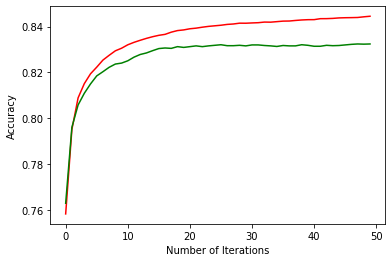

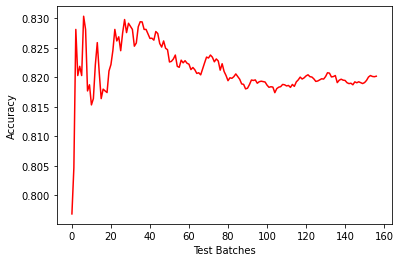

Epoch 1, train loss: 2.03, Validation loss: 1.73
Epoch 11, train loss: 0.77, Validation loss: 0.80


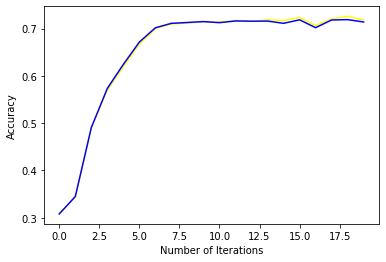

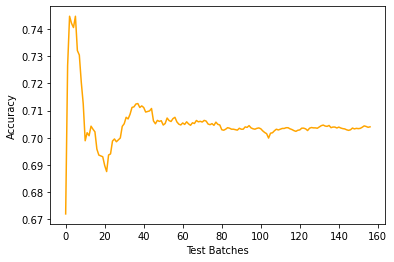

Epoch 1, train loss: 1.33, Validation loss: 1.04
Epoch 11, train loss: 0.61, Validation loss: 0.57
Epoch 1, train loss: 1.10, Validation loss: 0.77
Epoch 11, train loss: 0.54, Validation loss: 0.53
Epoch 1, train loss: 2.26, Validation loss: 2.21
Epoch 11, train loss: 1.76, Validation loss: 1.74


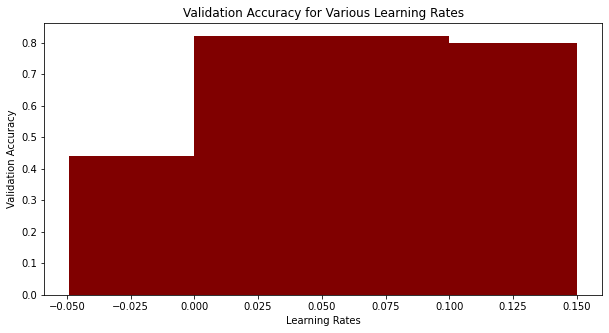

Epoch 1, train loss: 2.24, Validation loss: 2.12
Epoch 11, train loss: 0.94, Validation loss: 0.93


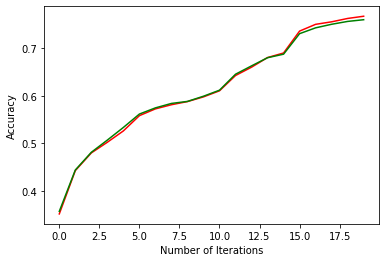

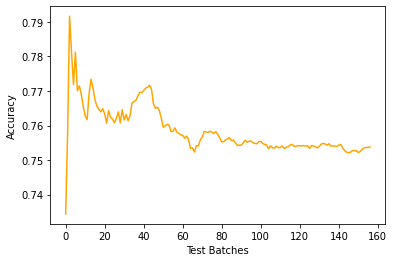

Epoch 10, train loss: 0.77, Validation loss: 0.77
Epoch 20, train loss: 0.66, Validation loss: 0.69
Epoch 30, train loss: 0.63, Validation loss: 0.67


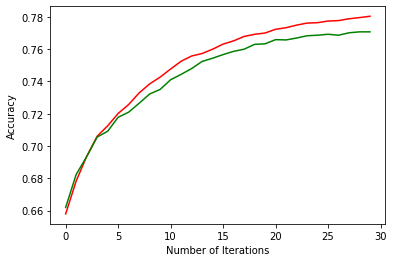

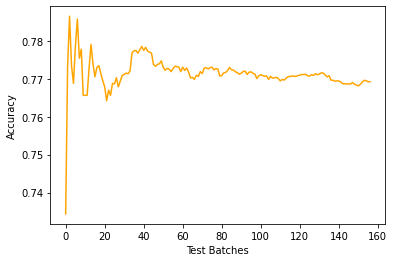

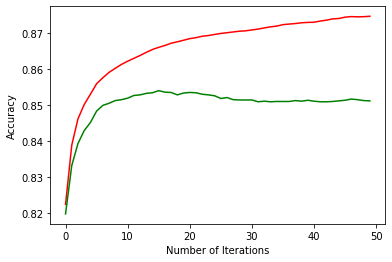

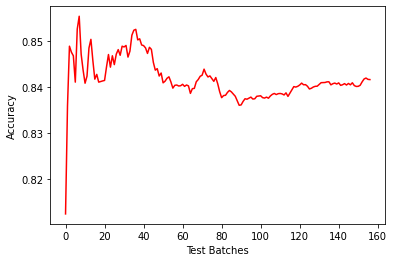

Epoch 1, train loss: 1.51, Validation loss: 0.98
Epoch 11, train loss: 0.35, Validation loss: 0.38


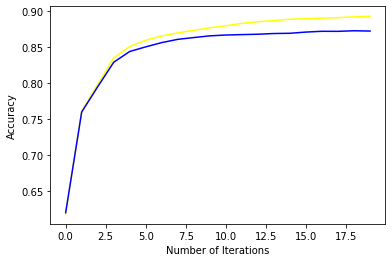

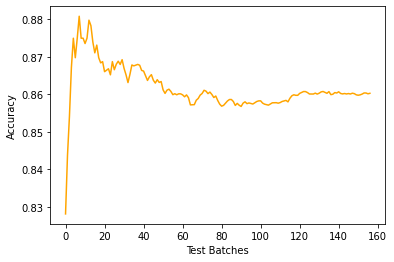

Epoch 1, train loss: 0.61, Validation loss: 0.43
Epoch 11, train loss: 0.28, Validation loss: 0.36
Epoch 1, train loss: 0.66, Validation loss: 0.45
Epoch 11, train loss: 0.29, Validation loss: 0.33
Epoch 1, train loss: 2.15, Validation loss: 1.93
Epoch 11, train loss: 0.59, Validation loss: 0.58


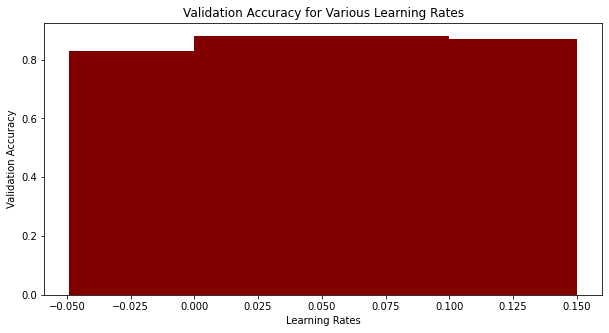

Epoch 1, train loss: 1.83, Validation loss: 1.37
Epoch 11, train loss: 0.42, Validation loss: 0.43


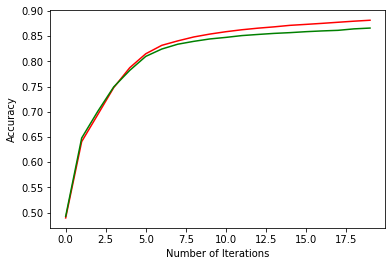

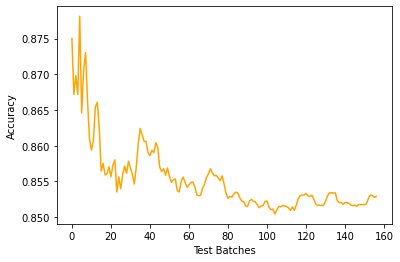

Epoch 10, train loss: 0.27, Validation loss: 0.34
Epoch 20, train loss: 0.22, Validation loss: 0.37
Epoch 30, train loss: 0.19, Validation loss: 0.41


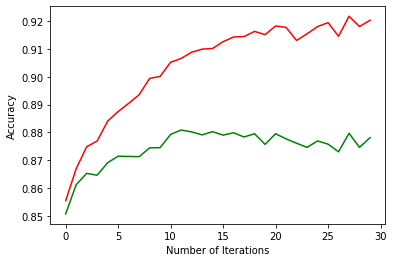

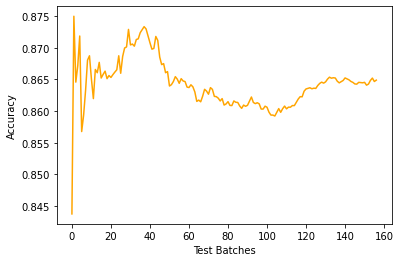

Epoch 10, train loss: 0.28, Validation loss: 0.36
Epoch 20, train loss: 0.22, Validation loss: 0.36
Epoch 30, train loss: 0.20, Validation loss: 0.42


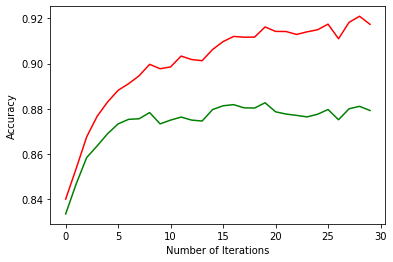

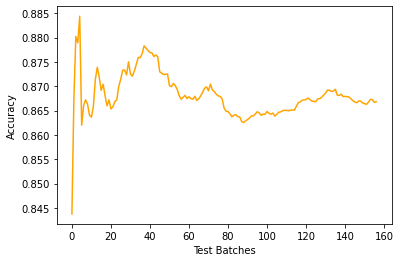

Sequential(
  (0): Linear(in_features=784, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)

In [ ]:
load_dataset()
# 4 neurons per layer
number_of_neurons = 4
one_hidden_layer_no_activation(number_of_neurons)
two_hidden_layers_sigmoid(number_of_neurons)
two_hidden_layers_relu(number_of_neurons)
two_hidden_layers_relu_adam(number_of_neurons)
# 32 neurons per layer
number_of_neurons = 32
one_hidden_layer_no_activation(number_of_neurons)
two_hidden_layers_sigmoid(number_of_neurons)
two_hidden_layers_relu(number_of_neurons)
two_hidden_layers_relu_adam(number_of_neurons)
four_hidden_layers_adam(number_of_neurons)

In [ ]:
number_of_neurons = 32

Test data accuracy is 75.20999908447266


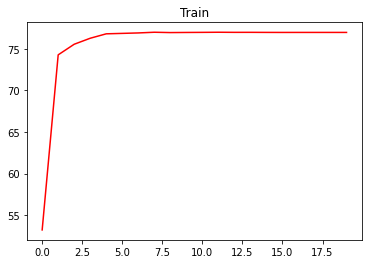

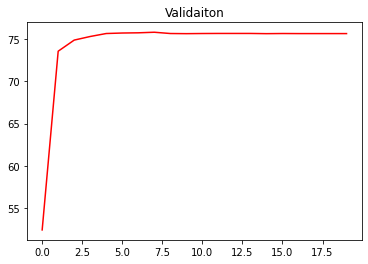

In [ ]:
two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)

Test data accuracy is 75.1800000667572


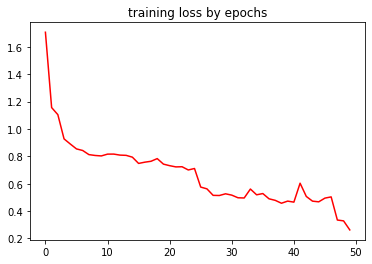

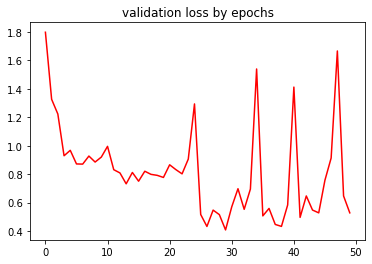

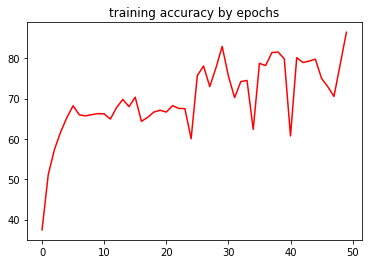

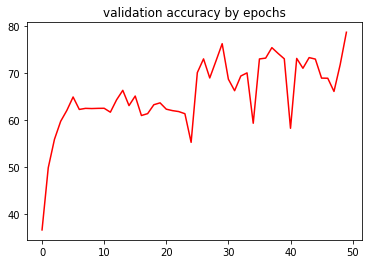

In [ ]:
four_hidden_layers_adam_early_stopping(number_of_neurons)

In [ ]:
four_hidden_layers_adam_weight_decay(number_of_neurons)

After implementing, running and getting the results Answer the following below:
1. The networks sorted according to their test results from the worst to the best.
2. Give intuitive explanation why we got such order after sorting.
3. Is there any difference between the test and the training accuracy? Why?
4. Don't forget to keep all the function plots in the notebook

Answers:

1. As we can see from the graphs we got when number of neurons is 4 we can sort the test results from worst to the best at that way:
* two_hidden_layers_sigmoid(4) - worst
* two_hidden_layers_relu(4)
* one_hidden_layer_no_activation(4)
* four_hidden_layers_decay(32)
*
*
*

* two_hidden_layers_relu(32)
* two_hidden_layers_relu_adam(32) (the best)


---


2. As we can see that 32 neurons per layer is usually better than 4 neurons and that was expected since 4 can lead to underfit the data, but in on the other hand in 32 the results were lower than the expected so sometimes in simple models we can get better results. also Adam gives better results than SGD.


---


3. Yes, the training accuracy is higher than the test accuracy, that sometimes we can see a big gab betwwen them.


---


4. **Plots:**

 1. one_hidden_layer_no_activation(4)

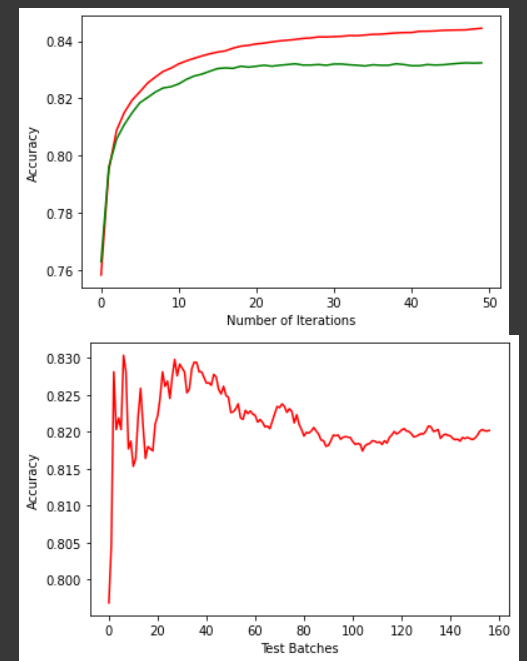



2. two_hidden_layers_sigmoid(4):


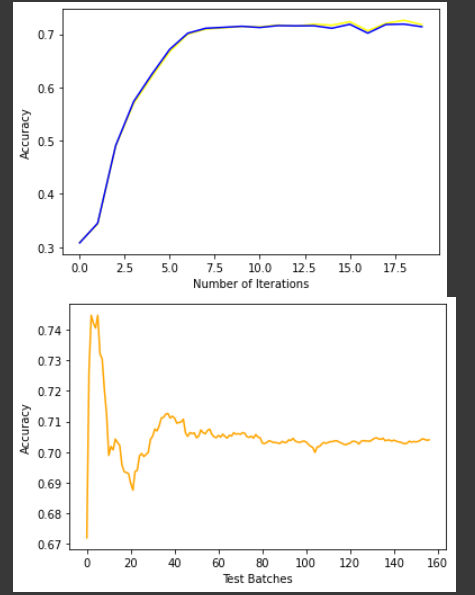

3. two_hidden_layers_relu:

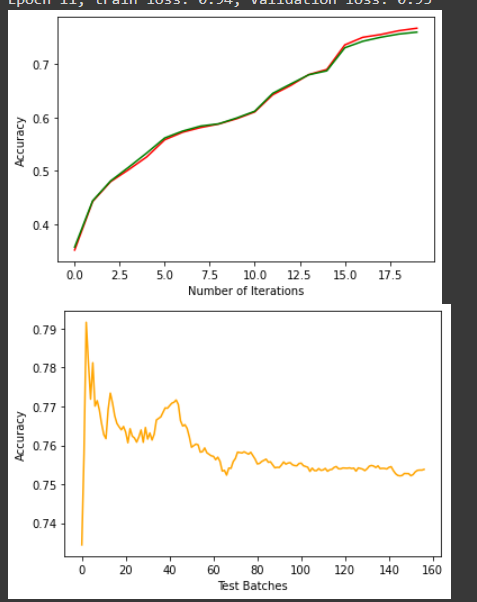

4. two_hidden_layers_relu_adam(4):


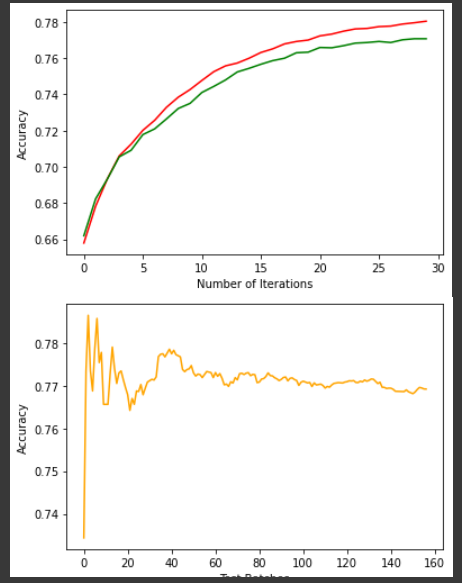

5.one_hidden_layer_no_activation(32):


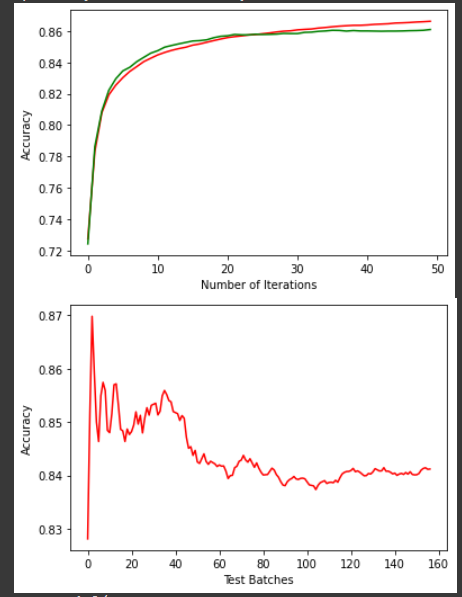

6. two_hidden_layers_sigmoid(32):

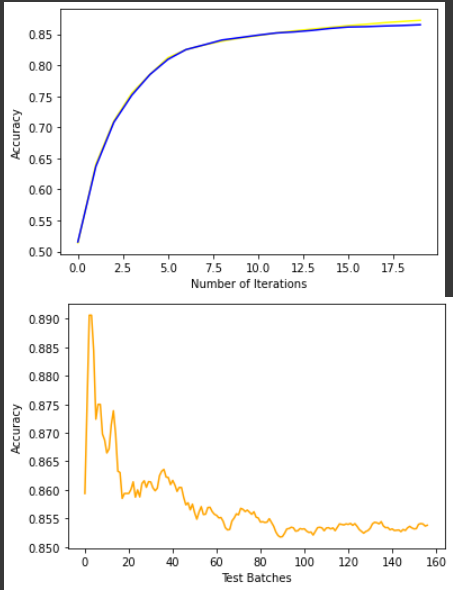

7. two_hiden_layers_relu(32):

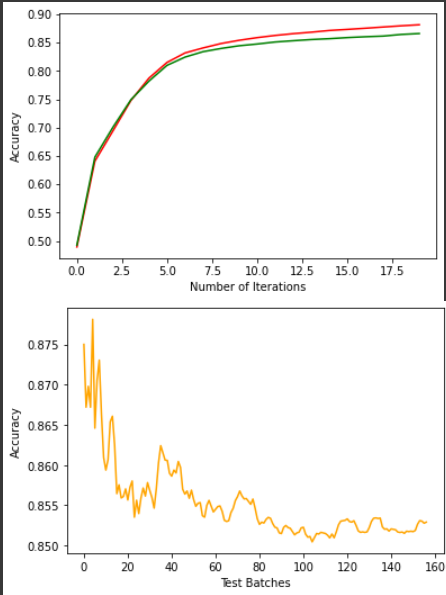


 *** You can see graphs under every call function command above.


